In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Create a training data frame with x and y values.
# The x are selected from speed values.
# The y are selected from power values.
train = pd.read_csv("powerproduction.csv")
#Remove rowes with '0' for power output
train = train.loc[(train != 0).all(axis=1), :]
train['speed'] = train.speed
train['power'] = train.power
train

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [4]:
# Create a corresponding test data frame.
test = pd.read_csv("powerproduction.csv")
# Remove rows with '0' for power output
test = test.loc[(test != 0).all(axis=1), :]
test = test.sample(n=40)
test['speed'] = test.speed
test['power'] = test.power
test

,speed,power
270,13.739,63.265
241,12.262,46.136
414,20.521,94.980
127,6.456,3.510
8,0.501,1.048
153,7.633,14.788
55,2.953,2.894
462,23.298,96.337
244,12.362,40.519
197,10.110,26.427


In [5]:
# Train a different model.
model1 = kr.models.Sequential()
model1.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model1.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
history = model1.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [6]:
# Fit the data.
history = model1.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 578us/step - loss: 4332.9588
Epoch 2/500
46/46 [==============================] - 0s 507us/step - loss: 4287.6336
Epoch 3/500
46/46 [==============================] - 0s 489us/step - loss: 4043.1262
Epoch 4/500
46/46 [==============================] - 0s 533us/step - loss: 3473.1205
Epoch 5/500
46/46 [==============================] - 0s 511us/step - loss: 3550.4224
Epoch 6/500
46/46 [==============================] - 0s 489us/step - loss: 3428.0317
Epoch 7/500
46/46 [==============================] - 0s 489us/step - loss: 3040.8501
Epoch 8/500
46/46 [==============================] - 0s 489us/step - loss: 3002.2974
Epoch 9/500
46/46 [==============================] - 0s 556us/step - loss: 2799.1020
Epoch 10/500
46/46 [==============================] - 0s 489us/step - loss: 2609.6523
Epoch 11/500
46/46 [==============================] - 0s 510us/step - loss: 2521.0659
Epoch 12/500
46/46 [==============================] - 0s 511us/

46/46 [==============================] - 0s 578us/step - loss: 111.7304
Epoch 98/500
46/46 [==============================] - 0s 578us/step - loss: 113.1503
Epoch 99/500
46/46 [==============================] - 0s 533us/step - loss: 99.3031
Epoch 100/500
46/46 [==============================] - 0s 556us/step - loss: 106.2544
Epoch 101/500
46/46 [==============================] - 0s 489us/step - loss: 106.9208
Epoch 102/500
46/46 [==============================] - 0s 533us/step - loss: 96.3174
Epoch 103/500
46/46 [==============================] - 0s 489us/step - loss: 103.0720
Epoch 104/500
46/46 [==============================] - 0s 511us/step - loss: 98.9845
Epoch 105/500
46/46 [==============================] - 0s 578us/step - loss: 91.0989
Epoch 106/500
46/46 [==============================] - 0s 578us/step - loss: 88.5145
Epoch 107/500
46/46 [==============================] - 0s 556us/step - loss: 79.9627
Epoch 108/500
46/46 [==============================] - 0s 533us/step - loss:

46/46 [==============================] - 0s 556us/step - loss: 53.7947
Epoch 194/500
46/46 [==============================] - 0s 578us/step - loss: 54.5435
Epoch 195/500
46/46 [==============================] - 0s 556us/step - loss: 51.0623
Epoch 196/500
46/46 [==============================] - 0s 578us/step - loss: 51.3720
Epoch 197/500
46/46 [==============================] - 0s 533us/step - loss: 49.1509
Epoch 198/500
46/46 [==============================] - 0s 511us/step - loss: 47.3217
Epoch 199/500
46/46 [==============================] - 0s 555us/step - loss: 49.8014
Epoch 200/500
46/46 [==============================] - 0s 533us/step - loss: 44.7292
Epoch 201/500
46/46 [==============================] - 0s 511us/step - loss: 47.3019
Epoch 202/500
46/46 [==============================] - 0s 511us/step - loss: 50.5449
Epoch 203/500
46/46 [==============================] - 0s 511us/step - loss: 47.2977
Epoch 204/500
46/46 [==============================] - 0s 556us/step - loss: 46

46/46 [==============================] - 0s 533us/step - loss: 26.6348
Epoch 290/500
46/46 [==============================] - 0s 578us/step - loss: 25.2494
Epoch 291/500
46/46 [==============================] - 0s 511us/step - loss: 24.7474
Epoch 292/500
46/46 [==============================] - 0s 489us/step - loss: 23.6107
Epoch 293/500
46/46 [==============================] - 0s 489us/step - loss: 28.1111
Epoch 294/500
46/46 [==============================] - 0s 511us/step - loss: 25.0993
Epoch 295/500
46/46 [==============================] - 0s 489us/step - loss: 23.7436
Epoch 296/500
46/46 [==============================] - 0s 489us/step - loss: 24.9094
Epoch 297/500
46/46 [==============================] - 0s 467us/step - loss: 26.5966
Epoch 298/500
46/46 [==============================] - 0s 556us/step - loss: 24.6026
Epoch 299/500
46/46 [==============================] - 0s 467us/step - loss: 22.4052
Epoch 300/500
46/46 [==============================] - 0s 511us/step - loss: 26

46/46 [==============================] - 0s 555us/step - loss: 18.2872
Epoch 386/500
46/46 [==============================] - 0s 511us/step - loss: 20.6326
Epoch 387/500
46/46 [==============================] - 0s 511us/step - loss: 22.5257
Epoch 388/500
46/46 [==============================] - 0s 489us/step - loss: 20.3239
Epoch 389/500
46/46 [==============================] - 0s 489us/step - loss: 19.5045
Epoch 390/500
46/46 [==============================] - 0s 511us/step - loss: 20.3250
Epoch 391/500
46/46 [==============================] - 0s 467us/step - loss: 20.2523
Epoch 392/500
46/46 [==============================] - 0s 511us/step - loss: 19.8036
Epoch 393/500
46/46 [==============================] - 0s 489us/step - loss: 16.9744
Epoch 394/500
46/46 [==============================] - 0s 511us/step - loss: 18.5743
Epoch 395/500
46/46 [==============================] - 0s 489us/step - loss: 20.3404
Epoch 396/500
46/46 [==============================] - 0s 511us/step - loss: 18

46/46 [==============================] - 0s 533us/step - loss: 19.1840
Epoch 482/500
46/46 [==============================] - 0s 511us/step - loss: 19.4165
Epoch 483/500
46/46 [==============================] - 0s 511us/step - loss: 17.0509
Epoch 484/500
46/46 [==============================] - 0s 511us/step - loss: 17.9883
Epoch 485/500
46/46 [==============================] - 0s 489us/step - loss: 17.6966
Epoch 486/500
46/46 [==============================] - 0s 489us/step - loss: 19.2973
Epoch 487/500
46/46 [==============================] - 0s 489us/step - loss: 17.9272
Epoch 488/500
46/46 [==============================] - 0s 511us/step - loss: 17.2041
Epoch 489/500
46/46 [==============================] - 0s 467us/step - loss: 17.8567
Epoch 490/500
46/46 [==============================] - 0s 511us/step - loss: 17.7052
Epoch 491/500
46/46 [==============================] - 0s 511us/step - loss: 18.1686
Epoch 492/500
46/46 [==============================] - 0s 533us/step - loss: 16

In [7]:
# Take four hand-picked values and see their predictions.
model1.predict([5.0, 6.0, 7.9, 8.8, 10.0, 12.0, 14.9, 15.0, 23.0])

array([[  4.516594 ],
       [  4.6240416],
       [  7.2543373],
       [ 11.128096 ],
       [ 19.866655 ],
       [ 41.968117 ],
       [ 75.18059  ],
       [ 76.08017  ],
       [100.94713  ]], dtype=float32)

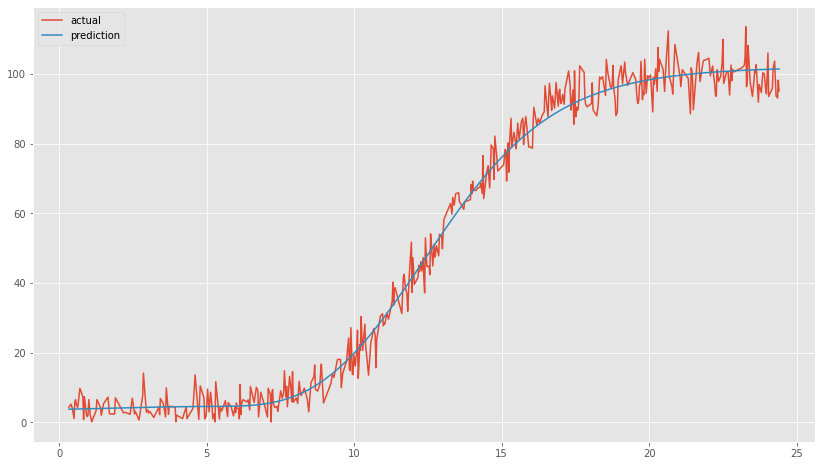

In [8]:
# Now let's see.
plt.plot(train['speed'], train['power'], label='actual')
plt.plot(train['speed'], model1.predict(train['speed']), label='prediction')
plt.legend();

In [9]:
# Evaluate the neural network on the test data.
model1.evaluate(train['speed'], train['power'])



15/15 [==============================] - 0s 429us/step - loss: 17.4903


17.490318298339844

In [10]:
# save model and architecture to single file
model1.save("model1.h5")
print("Saved model to disk")

Saved model to disk
